# Calculation of attack probability in Bitcoin Blockchain

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Calculate the probability of successful attack 

Reference: https://bitcoin.org/bitcoin.pdf (Section 11)

In [2]:
# p = probability an honest node finds the next block
# q = probability the attacker finds the next block
# z = probability the attacker will ever catch up from z blocks behind
# Lambda = attacker's expected potential progress


def AttackerSuccessProbability(q, z):
    p = 1 - q
    Lambda = z * (q / p)
    Sum = 1.0 
    for k in range(0, z + 1):
        poisson = np.exp( -Lambda)
        for i in range(1, k + 1):
            poisson *= Lambda / i
        Sum -= poisson * ( 1 - np.power(q / p, z - k))
    return Sum

In [3]:
AttackerSuccessProbability(0.1,6)

0.00024280274536281864

In [4]:
AttackerSuccessProbability(0.49,10)

0.9464793832760894

### Let's do some plotting

In [5]:
z = np.arange(0,11,1)
z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
type(z)

numpy.ndarray

In [7]:
result_q1 =  np.array([])
result_q2 =  np.array([])
for i in z:
    result_q1 = np.append(result_q1, [AttackerSuccessProbability(0.1, i)])
    result_q2 = np.append(result_q2, [AttackerSuccessProbability(0.3, i)])

In [8]:
result_q1

array([1.00000000e+00, 2.04587274e-01, 5.09778928e-02, 1.31722417e-02,
       3.45524347e-03, 9.13682188e-04, 2.42802745e-04, 6.47353169e-05,
       1.72998042e-05, 4.63116397e-06, 1.24140217e-06])

[Text(0,0.5,'Probability of successful Attack'),
 Text(0.5,0,'z Blocks ahead'),
 Text(0.5,1,'Simulation experiment')]

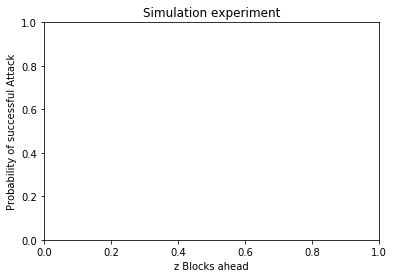

In [9]:
fig, ax = plt.subplots() # create a new plot
ax.set(xlabel='z Blocks ahead', 
       ylabel='Probability of successful Attack',
       title='Simulation experiment')

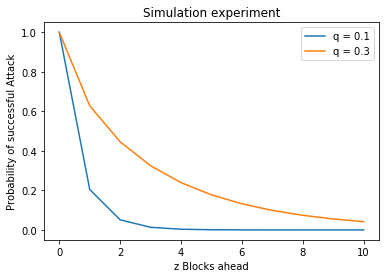

In [10]:
fig, ax = plt.subplots() # create a new plot

# plot
ax.plot(z, result_q1, label="q = 0.1")
ax.plot(z, result_q2, label="q = 0.3")

# some settings about axis and title
ax.set(xlabel='z Blocks ahead', 
       ylabel='Probability of successful Attack',
       title='Simulation experiment')
ax.legend(loc = "upper right")

# show the plot
plt.show()

# save to a pdf file (optional)
fig.savefig("Simulation experiment.pdf")

In [11]:
pb = np.arange(0.10, 0.50, 0.05)
pb

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

In [12]:
AttackerSuccessProbability(0.1, 5)

0.0009136821879279122

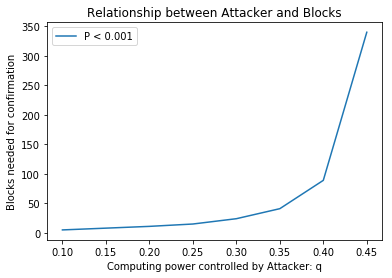

In [13]:
fig, ax = plt.subplots() # create a new plot

# plot
ax.plot(pb, [5, 8, 11, 15, 24, 41, 89, 340], label="P < 0.001")

# some settings about axis and title
ax.set(xlabel='Computing power controlled by Attacker: q', 
       ylabel='Blocks needed for confirmation',
       title='Relationship between Attacker and Blocks')
ax.legend(loc = "upper left")

# show the plot
plt.show()

# save to a pdf file (optional)
fig.savefig("Relationship.pdf")